In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [70]:
df= pd.read_csv(r'..\Datasets\Housing-1.csv')

In [71]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


<Axes: ylabel='Frequency'>

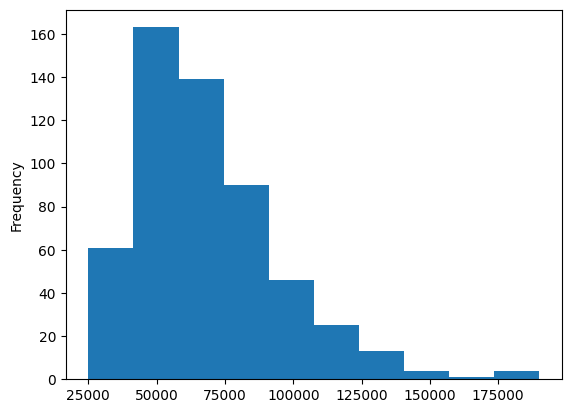

In [73]:
df['price'].plot(kind='hist')

### One Hot Encoding


Encode using pandas `get_dummies` function

In [74]:
X = df[['driveway']]
y = df['price']

In [75]:
X.head(10)

,driveway
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


In [76]:
#dum_X = pd.get_dummies(X, drop_first=True)      # drop_first=True to avoid the first column which is the constant column
#print(dum_X.head(10))

In [77]:
dum_X = pd.get_dummies(X, drop_first=True, dtype=int) # drop_first=True to avoid the first column
print(dum_X.head(10))

   driveway_yes
0             1
1             1
2             1
3             1
4             1
5             1
6             1
7             1
8             1
9             1


In [78]:
lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)


Intercept 48555.77922077928
Coeffecients [22778.11630161]


In [79]:
equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

Equation of the line: 48555.77922077928 + 22778.116301608778 * X1


In [80]:
df.groupby('driveway')['price'].mean()          # This show similarity between driveway and price as linear regression

driveway
no     48555.779221
yes    71333.895522
Name: price, dtype: float64

In [81]:
dum_X = pd.get_dummies(X)      # drop_first=True to avoid the first column which is the constant column
dum_X.drop('driveway_yes', axis=1, inplace=True)
print(dum_X.head(10))

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

   driveway_no
0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
Intercept 71333.89552238805
Coeffecients [-22778.11630161]
Equation of the line: 71333.89552238805 + -22778.116301608745 * X1


**Enconde using `OneHotEncoder` in one column**

In [83]:
X = df[['driveway']]
y = df['price']

In [84]:
ohe = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
dum_X = ohe.fit_transform(X)

lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]} * X{i+1}'
print("Equation of the line:",equation)
 

Intercept -1.679034601624664e+18
Coeffecients [1.6790346e+18 1.6790346e+18]
Equation of the line: -1.679034601624664e+18 + 1.6790346016247096e+18 * X1 + 1.679034601624736e+18 * X2


**Enconde using `OneHotEncoder` in two columns**

In [85]:
X = df[['driveway', 'airco']]
y = df['price']

In [87]:
X.head()

,driveway,airco
0,yes,no
1,yes,no
2,yes,no
3,yes,no
4,yes,no


In [88]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
dum_X = ohe.fit_transform(X)
dum_X.head()

,driveway_yes,airco_yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [90]:
lr = LinearRegression()
lr.fit(dum_X, y)

print('Intercept',lr.intercept_)
print('Coeffecients',lr.coef_)

equation = str(lr.intercept_)
for i in range(len(lr.coef_)):
    equation += f' + {lr.coef_[i]}*X{i+1}'
print("Equation of the line:",equation)

Intercept 43790.67032031884
Coeffecients [19302.6687155 24460.8923557]
Equation of the line: 43790.67032031884 + 19302.66871550184*X1 + 24460.89235569686*X2


**Example of sparse_output=False and True**

In [67]:
from sklearn.preprocessing import OneHotEncoder
#sparse_output=False: The output matrix is in a dense format (a regular NumPy array). 
#This format may be easier to work with for smaller datasets but is not memory-efficient 
#for large datasets with many categories, as it stores every zero value explicitly.

encoder = OneHotEncoder(sparse_output=False)  # Set to False for dense output
data = [['cat'], ['dog'], ['bird']]
encoded_data = encoder.fit_transform(data)

print(encoded_data)


[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [68]:
from sklearn.preprocessing import OneHotEncoder
#sparse_output=True: The output matrix is in a sparse format (specifically, a scipy.sparse.csr_matrix). 
#This format is memory-efficient when you have a large number of categories, 
#especially if most entries are zero (which is typical in one-hot encoding).

encoder = OneHotEncoder(sparse_output=True)  # Set to True for dense output
data = [['cat'], ['dog'], ['bird']]
encoded_data = encoder.fit_transform(data)

print(encoded_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 2)	1.0
  (2, 0)	1.0


### Using categorical with numerical data hotencoding


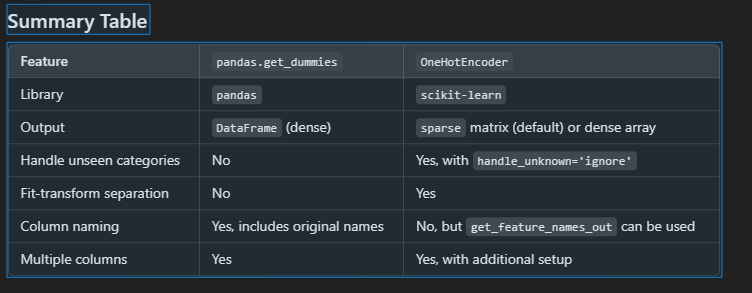

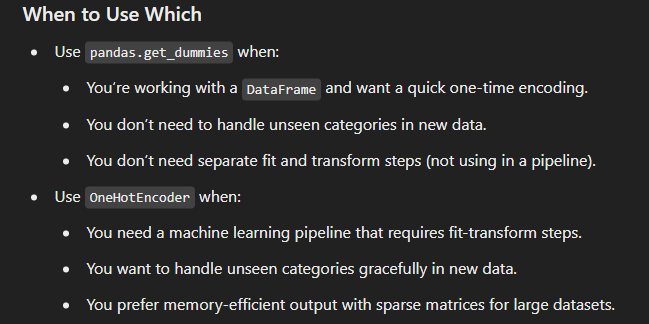

In [91]:
X = df[['driveway', 'airco', 'bedrooms']]
y = df['price']

In [93]:
X.head()

,driveway,airco,bedrooms
0,yes,no,3
1,yes,no,2
2,yes,no,3
3,yes,no,3
4,yes,no,2


##### pd.get_dummies 
get_dummies does the hot encoding of only object type variables



In [94]:
dum_X = pd.get_dummies(X)
dum_X

,bedrooms,driveway_no,driveway_yes,airco_no,airco_yes
0,3,False,True,True,False
1,2,False,True,True,False
2,3,False,True,True,False
3,3,False,True,True,False
4,2,False,True,True,False
...,...,...,...,...,...
541,3,False,True,False,True
542,3,False,True,False,True
543,3,False,True,False,True
544,3,False,True,False,True


##### OneHotEncoder 
OneHotEndoder does encoding on object as well as numeric due to this more number of features will be created.

In [96]:
X.head()

,driveway,airco,bedrooms
0,yes,no,3
1,yes,no,2
2,yes,no,3
3,yes,no,3
4,yes,no,2


In [97]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
dum_X = ohe.fit_transform(X)
dum_X

,driveway_yes,airco_yes,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
541,1.0,1.0,0.0,1.0,0.0,0.0,0.0
542,1.0,1.0,0.0,1.0,0.0,0.0,0.0
543,1.0,1.0,0.0,1.0,0.0,0.0,0.0
544,1.0,1.0,0.0,1.0,0.0,0.0,0.0


##### Columns Transformer

In [98]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

In [99]:
str_col = df.columns[df.dtypes == 'object'].to_list()
num_col = df.columns[df.dtypes != 'object'].to_list()

In [100]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')


`make_column_transformer` in `sklearn` is a function used to create a column transformer that allows<br> you _to apply different preprocessing steps_ to different columns of your dataset.<br> This is particularly useful for datasets with mixed types of features (e.g., numerical and categorical) and <br>allows you to define a preprocessing pipeline for each type of feature.


In [101]:
ct = make_column_transformer(
    ('passthrough', num_col), 
    (ohe,str_col), 
    verbose_feature_names_out=True
).set_output(transform='pandas')
ct.fit_transform(df)

,passthrough__price,passthrough__lotsize,passthrough__bedrooms,passthrough__bathrms,passthrough__stories,passthrough__garagepl,onehotencoder__driveway_yes,onehotencoder__recroom_yes,onehotencoder__fullbase_yes,onehotencoder__gashw_yes,onehotencoder__airco_yes,onehotencoder__prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0


In [102]:
ct = make_column_transformer(
    ('passthrough', num_col), 
    (ohe,str_col), 
    verbose_feature_names_out=False
).set_output(transform='pandas')
ct.fit_transform(df)

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0


`make_column_selector` in `sklearn` is a utility function used to create a callable that can select columns in a DataFrame based on specific criteria, such as data types or names. It is particularly useful when working with `ColumnTransformer` or when you want to apply transformations selectively to certain columns.


In [53]:
ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False,
).set_output(transform='pandas')

ct.fit_transform(df)


,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1.0,0.0,1.0,0.0,0.0,0.0
1,38500.0,4000,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
2,49500.0,3060,3,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
3,60500.0,6650,3,1,2,0,1.0,1.0,0.0,0.0,0.0,0.0
4,61000.0,6360,2,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1.0,1.0,0.0,0.0,1.0,0.0
542,94000.0,6000,3,2,4,0,1.0,0.0,0.0,0.0,1.0,0.0
543,103000.0,6000,3,2,4,1,1.0,1.0,0.0,0.0,1.0,0.0
544,105000.0,6000,3,2,2,1,1.0,1.0,0.0,0.0,1.0,0.0


##### Column Transformation and Model Triaining

In [103]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False,
).set_output(transform='pandas')

In [104]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [105]:
X_ohe_trn = ct.fit_transform(X_train)
X_ohe_tst = ct.transform(X_test)

lr  = LinearRegression()
lr.fit(X_ohe_trn, y_train)

y_pred = lr.predict(X_ohe_tst)
r2_score(y_test, y_pred)

0.6246856191453718

##### Column Transformation and Model Training using pipeline

In [106]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [107]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')
ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False,
).set_output(transform='pandas')

In [108]:
pipe = Pipeline([
    ('columntransformer', ct),
    ('linearregression', lr)
])

In [109]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000003C13B56C00>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000003C13B545F0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [110]:
y_pred = pipe.predict(X_test) 
r2_score(y_test, y_pred)

0.6246856191453718

##### Pipelining: hotencoding -> polynomial transformation -> linear regression

In [111]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [112]:
ohe = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

ct = make_column_transformer(
    ('passthrough', make_column_selector(dtype_exclude=object)),
    (ohe, make_column_selector(dtype_include=object)),
    verbose_feature_names_out=False,
).set_output(transform='pandas')

pf = PolynomialFeatures(degree=2, include_bias=False).set_output(transform='pandas')


In [113]:
pipe = Pipeline([
    ('columntransformer', ct),
    ('polynomialfeatures', pf),
    ('linearregression', lr)
])

In [114]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('passthrough', 'passthrough',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000003C1615A180>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000003C161593A0>)],
                                   verbose_feature_names_out=False)),
                ('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [115]:
y_pred = pipe.predict(X_test) 
r2_score(y_test, y_pred)

0.5558314069067434